# Money aggregates comparison

This notebook compares different information sources for money aggregates.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
from dotenv import load_dotenv
import os
from utils import HEADERS

load_dotenv()

fred = Fred(api_key=os.environ.get("FRED_API_KEY"))

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

## United States
### M3

In [19]:
# MANM (M1) y MABM (M3)
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/USA.M.MABM.XDC..N...?format=csv"
s_oecd = pd.read_csv(
    url, storage_options=HEADERS, parse_dates=["TIME_PERIOD"], date_format="%Y-%m", index_col=["TIME_PERIOD"]
)["OBS_VALUE"].sort_index()
s_shadowstats = (
    pd.read_csv("data/m3-us.csv", sep=";", parse_dates=["Date"], index_col=["Date"])[
        "m3"
    ]
    * 1e3
)
s_fred = fred.get_series("M2NS") * 1e3

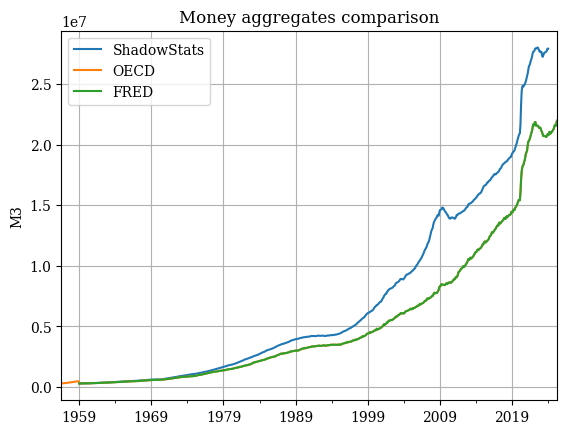

In [20]:
fig, ax = plt.subplots()
s_shadowstats.plot(ax=ax, label="ShadowStats")
s_oecd.plot(ax=ax, label="OECD")
s_fred.plot(ax=ax, label="FRED")

ax.set_xlabel("")
ax.set_ylabel("M3")
ax.set_title("Money aggregates comparison")
ax.grid()
ax.legend()

### M1

In [21]:
s_fred = fred.get_series("M1NS") * 1e3

url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/USA.M.MANM.XDC..N...?format=csv"
s_oecd = pd.read_csv(
    url, storage_options=HEADERS, parse_dates=["TIME_PERIOD"], date_format="%Y-%m", index_col=["TIME_PERIOD"]
)["OBS_VALUE"].sort_index()

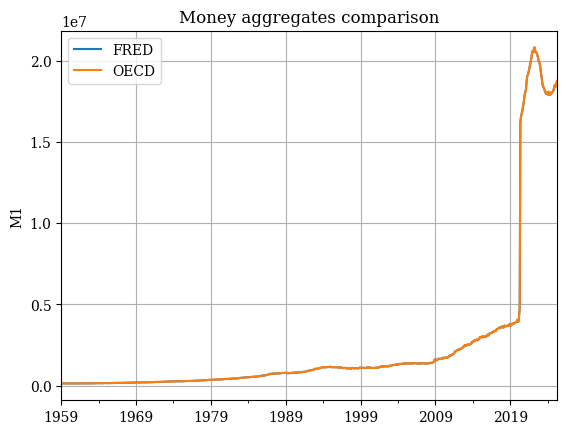

In [22]:
fig, ax = plt.subplots()
s_fred.plot(ax=ax, label="FRED")
s_oecd.plot(ax=ax, label="OECD")

ax.set_xlabel("")
ax.set_ylabel("M1")
ax.set_title("Money aggregates comparison")
ax.grid()
ax.legend();

## Japan

In [23]:
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/JPN.M.MABM.XDC..N...?format=csv"

s_oecd = pd.read_csv(
    url, storage_options=HEADERS, parse_dates=["TIME_PERIOD"], date_format="%Y-%m", index_col=["TIME_PERIOD"]
)["OBS_VALUE"].sort_index()

In [24]:
s_boj = (
    pd.read_csv(
        "data/m3-jp.csv",
        skiprows=3,
        names=["Date", "Value"],
        parse_dates=["Date"],
        date_format={"Date": "%Y/%m"},
        index_col="Date",
    )["Value"]
    * 100
)  # Monthly data, 100 million yen

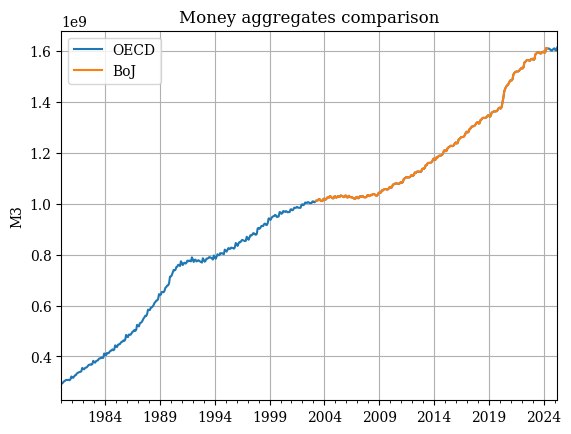

In [25]:
fig, ax = plt.subplots()
s_oecd.plot(ax=ax, label="OECD")
s_boj.plot(ax=ax, label="BoJ")

ax.set_xlabel("")
ax.set_ylabel("M3")
ax.set_title("Money aggregates comparison")
ax.legend()
ax.grid()

## Switzerland

In [26]:
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/CHE.M.MABM.XDC..N...?format=csv"

s_oecd = pd.read_csv(
    url, storage_options=HEADERS, parse_dates=["TIME_PERIOD"], date_format="%Y-%m", index_col=["TIME_PERIOD"]
)["OBS_VALUE"].sort_index()

In [27]:
from utils import get_snb_data

table_id = "snbmonagg"
params = {
    "dimSel": "D0(B),D1(GM3)",
    "fromDate": "1980-01",
}
# In CHF millions
s_snb = get_snb_data(table_id, params)["Value"]  # Monthly data
s_snb

Date
1984-12-01     252995
1985-01-01     252820
1985-02-01     253420
1985-03-01     256442
1985-04-01     257249
               ...   
2024-12-01    1158417
2025-01-01    1154605
2025-02-01    1160170
2025-03-01    1170555
2025-04-01    1176750
Name: Value, Length: 485, dtype: int64

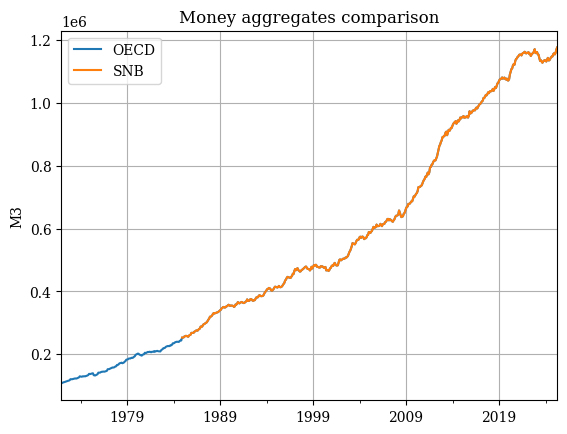

In [28]:
fig, ax = plt.subplots()
s_oecd.plot(ax=ax, label="OECD")
(s_snb).plot(ax=ax, label="SNB")

ax.set_xlabel("")
ax.set_ylabel("M3")
ax.set_title("Money aggregates comparison")
ax.legend()
ax.grid()

## United Kingdom

In [29]:
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES@DF_MONAGG,4.0/GBR.M.MABM.XDC..N...?format=csv"

s_oecd = pd.read_csv(
    url, storage_options=HEADERS, parse_dates=["TIME_PERIOD"], date_format="%Y-%m", index_col=["TIME_PERIOD"]
)["OBS_VALUE"].sort_index()

In [30]:
from utils import get_boe_data

s_boe = get_boe_data("LPMAUYN")

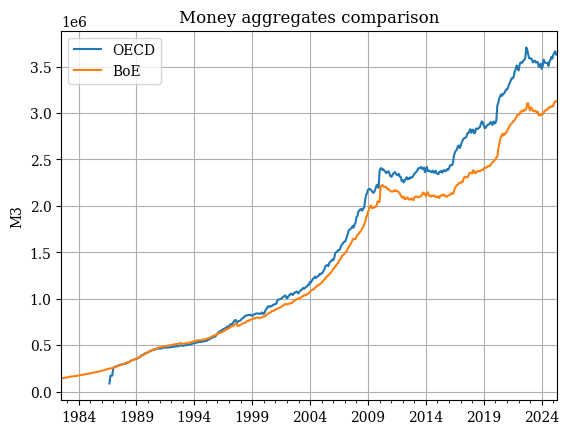

In [31]:
fig, ax = plt.subplots()
s_oecd.plot(ax=ax, label="OECD")
s_boe.plot(ax=ax, label="BoE")

ax.set_xlabel("")
ax.set_ylabel("M3")
ax.set_title("Money aggregates comparison")
ax.legend()
ax.grid()